In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

#Load Excel
df = pd.read_excel("Groceries_Sales_data.xlsx")
print("Excel preview:")
print(df.head())

#MySQL credentials
user = "root"
password = "your password"
host = "localhost"
database = "sales"

#Connection string
connection_string = f"mysql+mysqlconnector://{user}:{password}@{host}/{database}"
engine = create_engine(connection_string)

#Upload to MySQL
df.to_sql(name='sales', con=engine, if_exists='replace', index=False)


Excel preview:
        Date    Sales
0 2018-02-01  21199.0
1 2018-02-02  10634.0
2 2018-02-03   7966.0
3 2018-02-04   1353.0
4 2018-02-05   9497.0


In [2]:
query = """
SELECT 
    DATE_FORMAT(Date, '%Y-%m') AS month,
    SUM(Sales) AS total_sales
FROM sales
GROUP BY month
ORDER BY month
"""


     month  total_sales
0  2018-02     486981.7
1  2018-03     525202.4
2  2018-04     361852.6
3  2018-05     593280.8
4  2018-06     724892.6


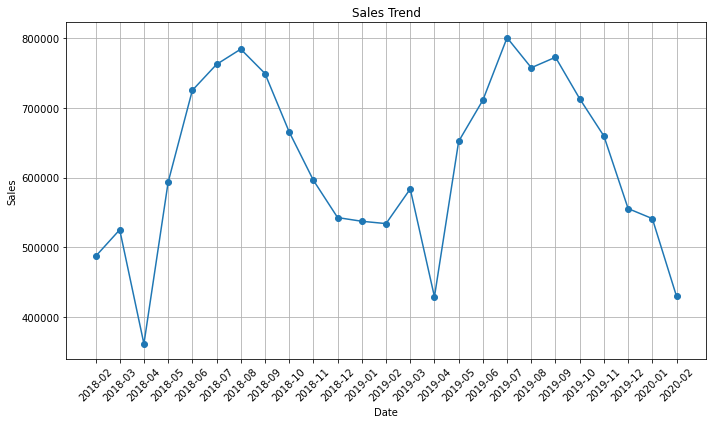

In [3]:
df = pd.read_sql(query, engine)

print(df.head())

plt.figure(figsize=(10, 6))
plt.plot(df.iloc[:, 0], df.iloc[:, 1], marker='o')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()
